In [1]:
# pip install imblearn

In [2]:
# pip install scipy --upgrade/

In [3]:
# pip install scikit-learn==1.2.2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
data = pd.read_csv('employee.csv')

In [6]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [7]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [9]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd677297d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd676bb410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6771fed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd677387d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd67739250>],
 'means': []}

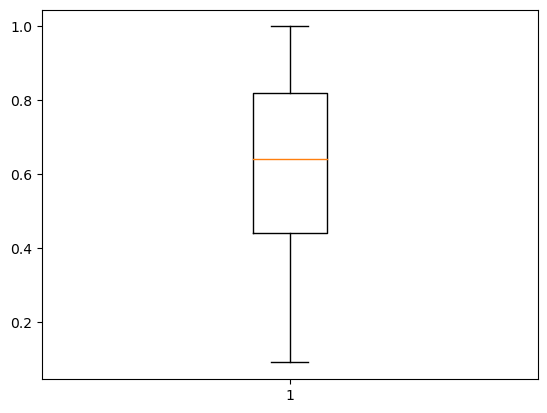

In [10]:
plt.boxplot(data['satisfaction_level'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6d7a6b10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6d7ac3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6d7a5ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6d7ad4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6d7adf90>],
 'means': []}

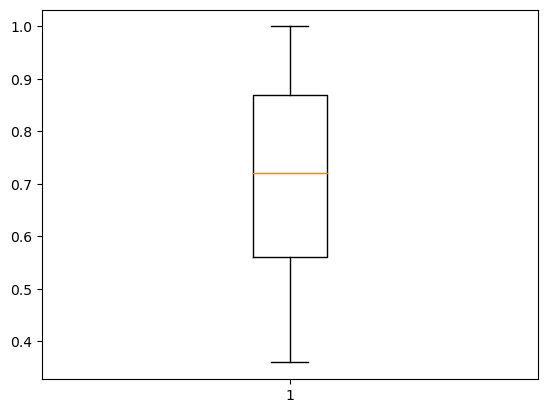

In [11]:
plt.boxplot(data['last_evaluation'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6d812150>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6772b110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6d775050>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6d818e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6d719910>],
 'means': []}

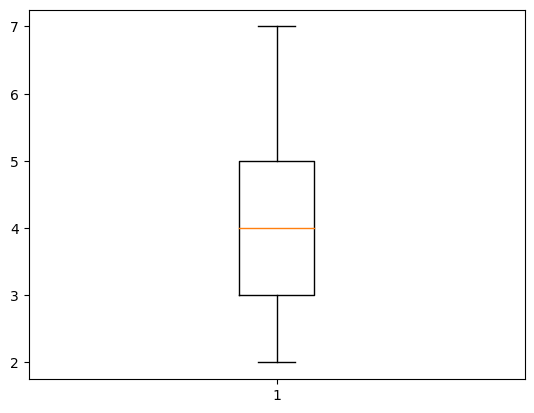

In [12]:
plt.boxplot(data['number_project'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6d882710>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6d883f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6d881d10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6d88d510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6d7bbbd0>],
 'means': []}

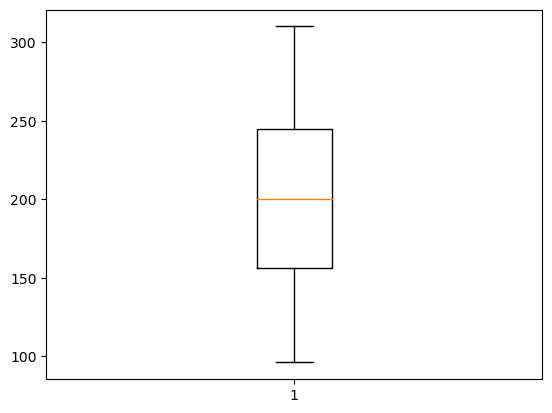

In [13]:
plt.boxplot(data['average_montly_hours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6d8dbd10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6d8e9650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6d88d050>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6d8eabd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6d7cb5d0>],
 'means': []}

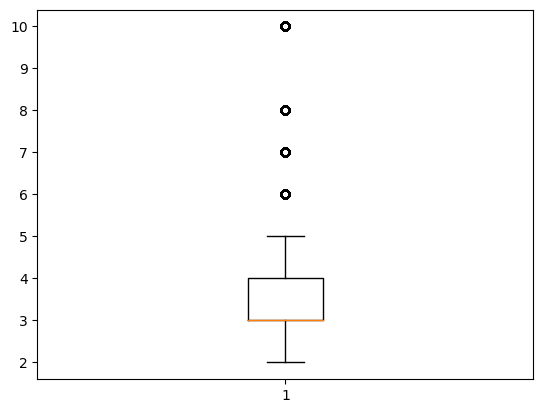

In [14]:
plt.boxplot(data['time_spend_company'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6f142050>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6f1437d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6f1413d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6f14cdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6f143310>],
 'means': []}

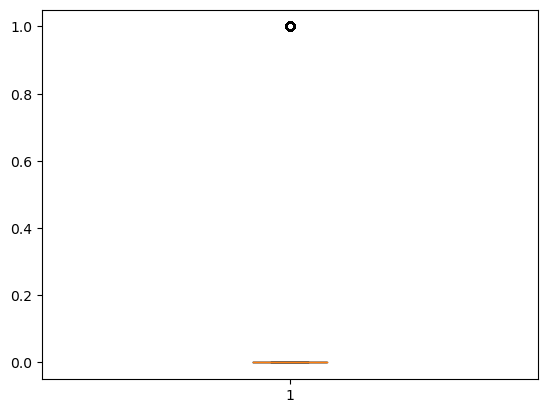

In [15]:
plt.boxplot(data['Work_accident'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6f1a8e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6f1aa650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6f193dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6f1abb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6d89dbd0>],
 'means': []}

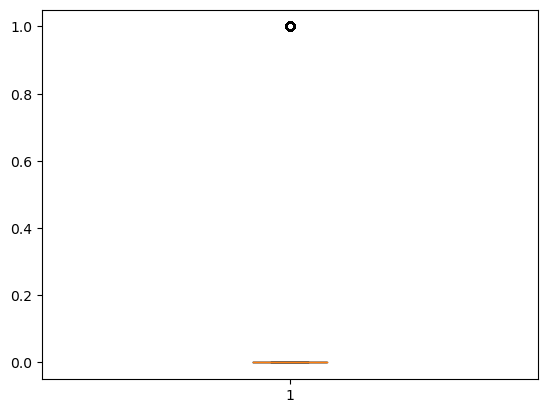

In [16]:
plt.boxplot(data['promotion_last_5years'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd6f214dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd6f216650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd6f214350>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd6f217b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd6f2205d0>],
 'means': []}

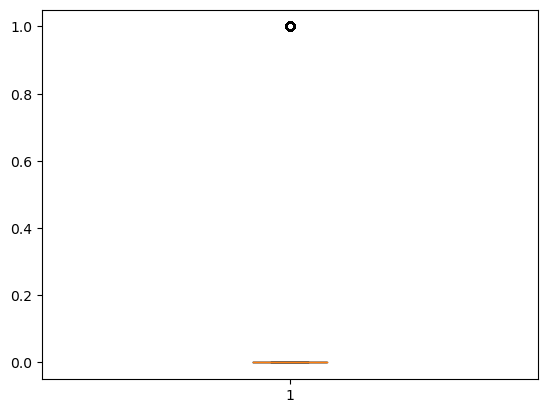

In [17]:
plt.boxplot(data['left'])

In [25]:
le_department = LabelEncoder()
data['department'] = le_department.fit_transform(data['department'])

In [27]:
le_salary = LabelEncoder()
data['salary'] = le_salary.fit_transform(data['salary'])

In [35]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,1
14995,0.37,0.48,2,160,3,0,0,8,1,1
14996,0.37,0.53,2,143,3,0,0,8,1,1
14997,0.11,0.96,6,280,4,0,0,8,1,1


In [36]:
data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [37]:
x = data.drop('left', axis=1)
y = data['left']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [39]:
x_train.shape

(11999, 9)

In [41]:
from collections import Counter
Counter(y_train)

Counter({0: 9137, 1: 2862})

In [42]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
Counter(y_train_smt)

Counter({0: 9137, 1: 9137})

In [43]:
model = DecisionTreeClassifier()
model.fit(x_train_smt, y_train_smt)
print('Train score:', model.score(x_train_smt, y_train_smt))
print('Test score', model.score(x_test, y_test))

Train score: 1.0
Test score 0.9693333333333334


In [44]:
model.get_depth()

24

In [45]:
y_pred = model.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[2214,   77],
       [  15,  694]], dtype=int64)